In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [54]:
respondentData = pd.read_csv("/Users/miceli/Documents/School/DataIncubator/AmericanTimeUse/atusresp_2015.csv")
rosterData = pd.read_csv("/Users/miceli/Documents/School/DataIncubator/AmericanTimeUse/atusrost_2015.csv")
whoData = pd.read_csv("/Users/miceli/Documents/School/DataIncubator/AmericanTimeUse/atuswho_2015.csv")
activityData = pd.read_csv("/Users/miceli/Documents/School/DataIncubator/AmericanTimeUse/atusact_2015.csv")
elderCareData = pd.read_csv("/Users/miceli/Documents/School/DataIncubator/AmericanTimeUse/atusrostec_2015.csv")
cpsData = pd.read_csv("/Users/miceli/Documents/School/DataIncubator/AmericanTimeUse/atuscps_2015.csv")

In [78]:
income = cpsData[['HEFAMINC','TUCASEID']]
print income.head()
income = income.drop_duplicates()
print income.head()
income = income.sort_values(by='HEFAMINC')
print income.head()

   HEFAMINC        TUCASEID
0         8  20150101150006
1         8  20150101150006
2        15  20150101150018
3        15  20150101150018
4        15  20150101150018
    HEFAMINC        TUCASEID
0          8  20150101150006
2         15  20150101150018
5          4  20150101150020
10         3  20150101150053
11         1  20150101150066
       HEFAMINC        TUCASEID
35735         1  20150705151670
18584         1  20150402151458
17047         1  20150401150714
8423          1  20150201152406
14701         1  20150302151629


In [55]:
activityDataLabels = pd.read_csv("/Users/miceli/Documents/School/DataIncubator/AmericanTimeUse/activityDataLabels.csv")

In [56]:
activityDecoder = pd.read_csv("/Users/miceli/Documents/School/DataIncubator/AmericanTimeUse/ActivityCodes.csv",quotechar='"')
incomeDecoder = pd.read_csv("/Users/miceli/Documents/School/DataIncubator/AmericanTimeUse/IncomeCodes.csv",quotechar='"')
#print activityDecoder
activityDecoderGrouped = activityDecoder.groupby(['TUTIER1CODE'])
print len(activityDecoderGrouped)
#print activityDecoderGrouped[activityDecoderGrouped['major code']==1]
print len(activityDecoder[activityDecoder['TUTIER1CODE']==1])
print activityDecoder[activityDecoder['TUTIER1CODE']==1]
#for codeName,decoder in activityDecoderGrouped:
#    print "****** "+str(codeName)
#    print decoder['second label']

actData = activityData.merge(activityDecoder, on=['TUTIER1CODE','TUTIER2CODE'])
#actData.head()

18
6
   TUTIER1CODE    tier1 label  TUTIER2CODE                tier2 label
0            1  Personal Care            1                   Sleeping
1            1  Personal Care            2         Grooming, dressing
2            1  Personal Care            3    Health-related selfcare
3            1  Personal Care            4        Personal Activities
4            1  Personal Care            5  Personal Care Emergencies
5            1  Personal Care           99       Personal Care n.e.c.


In [57]:
#feed in times from activityData data frame
#output minutes lapsed
def duration(stopTime,startTim):
    t2 = pd.Timedelta(stopTime)
    t1 = pd.Timedelta(startTim)
    dur = t2 - t1
    if dur < pd.Timedelta('0 days'):
        dur = dur + pd.Timedelta('1 days')
    return dur/pd.Timedelta(minutes=1)

def durationSeries(row):
    t2 = pd.Timedelta(row['TUSTOPTIME'])
    t1 = pd.Timedelta(row['TUSTARTTIM'])
    dur = t2 - t1
    if dur < pd.Timedelta('0 days'):
        dur = dur + pd.Timedelta('1 days')
    return dur/pd.Timedelta(minutes=1)
    

In [58]:
activityDataAbrrv = activityData[['TUCASEID','TUACTIVITY_N','TUACTDUR24','TUSTARTTIM','TUSTOPTIME','TUTIER1CODE','TUTIER2CODE','TUTIER3CODE']]

In [59]:
activityDataByRespondent = activityDataAbrrv.groupby('TUCASEID')

In [60]:
#construct dataframe of each person's time
timelabels=[]
for ActName1,actGroup1 in activityDecoderGrouped:
    lablOfG1 = actGroup1['tier1 label'].iloc[0]
    timelabels.append(lablOfG1)
#timelabels.append('person')
#print timelabels
#timeSpentDFtemp = pd.DataFrame.from_records([init1],columns=timelabels)
#timeSpentDF = timeSpentDF.append(timeSpentDFtemp,ignore_index=True)
#print timeSpentDF

found respondant!
found respondant!
found respondant!
found respondant!
found respondant!
found respondant!
found respondant!
found respondant!
found respondant!
found respondant!
found respondant!
found respondant!
found respondant!
found respondant!
found respondant!
found respondant!
found respondant!
found respondant!
found respondant!
found respondant!
****


[]

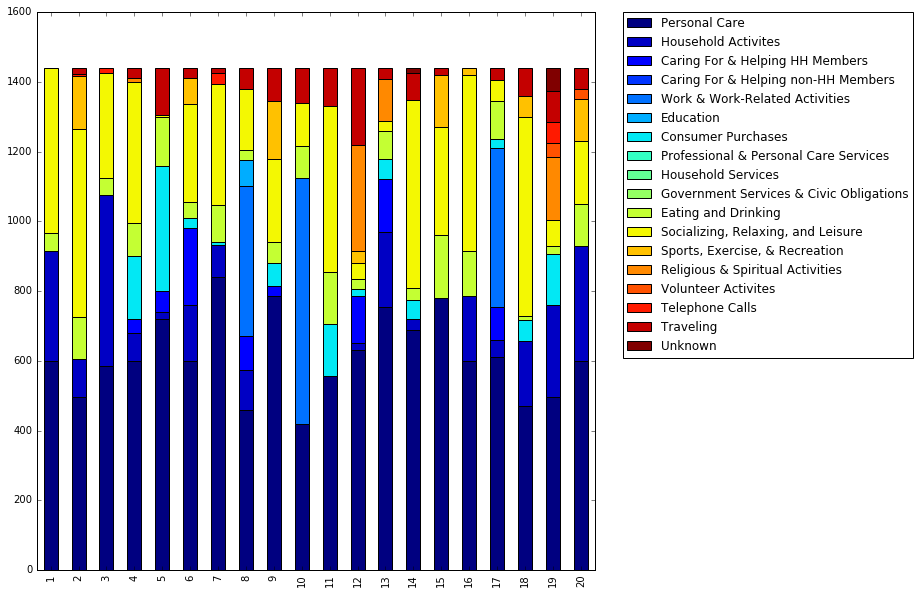

In [81]:
init = [0]*len(timelabels)
timeSpentDF = pd.DataFrame.from_records([init],columns=timelabels)
key_for_TimeSpentDF = []
numPeople=0

#add capability here to vary income range
incomeToPlot = income[income['HEFAMINC']>=13]
peopleToPlot = incomeToPlot['TUCASEID']


for respondentName,respAct in activityDataByRespondent:
    #if 20150101150018==respondentName:
    numPeople=numPeople+1
    
    
    if numPeople<=20:
    
        print "found respondant!"
        timeSpent=[0]*len(timelabels)
        i=0
        for ActName1,actGroup1 in activityDecoderGrouped:
            actsOfG1 = respAct[respAct['TUTIER1CODE']==ActName1]
            timeOfG1 = actsOfG1['TUACTDUR24'].sum()
            #print timeOfG1
            timeSpent[i] = timeOfG1
            i=i+1
        #print timeSpent
        thisPersonDF = pd.DataFrame.from_records([timeSpent],columns=timelabels)
        key_for_TimeSpentDF.append(respondentName)
        #print thisPersonDF
        timeSpentDF = timeSpentDF.append(thisPersonDF,ignore_index=True)

print "****"
timeSpentDF = timeSpentDF.drop(timeSpentDF.index[[0]])
ax = timeSpentDF.plot(kind='bar',stacked=True,figsize=(10,10), colormap='jet')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.plot()
            
    

[]

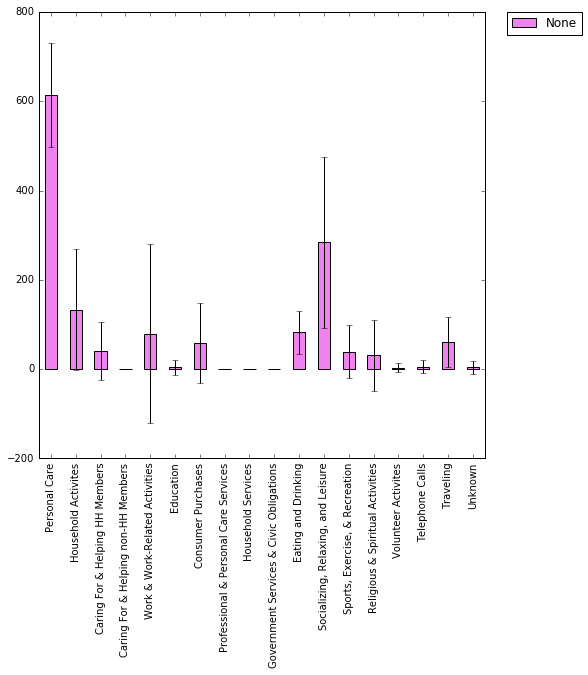

In [82]:
meantime = timeSpentDF.mean(axis=0)
stdtime = timeSpentDF.std(axis=0)
#print stdtime
#print type(stdtime)
ax2 = meantime.plot(kind='bar',stacked=True,figsize=(8,8), color='violet',yerr=stdtime)
ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax2.plot()

In [62]:
#dude, not working!
from bokeh.charts import Bar, output_file, show
from bokeh.charts.attributes import cat, color
from bokeh.charts.operations import blend
from bokeh.palettes import *

bar = Bar(timeSpentDF,
          values=blend('Personal Care', 'Household Activites', 'Caring For & Helping HH Members', 'Caring For & Helping non-HH Members', 'Work & Work-Related Activities', 'Education', 'Consumer Purchases', 'Professional & Personal Care Services', 'Household Services', 'Government Services & Civic Obligations', 'Eating and Drinking', 'Socializing, Relaxing, and Leisure', 'Sports, Exercise, & Recreation', 'Religious & Spiritual Activities', 'Volunteer Activites', 'Telephone Calls', 'Traveling', 'Unknown', name='activity', labels_name='activity'),
          stack=cat(columns='activity', sort=False),
          legend='top_right',
          title="Title")
#label=cat(columns='abbr', sort=False),

#color=color(columns='activity', palette='Spectral',sort=False),
          #tooltips=[('activity', '@activity')]) 

#, ('country', '@abbr')])


#output_file("stacked_bar.html", title="stacked_bar.py example")

show(bar)




AttributeError: 'DataFrame' object has no attribute 'tolist'